## Logic Based FizzBuzz Function [Software 1.0]

In [1]:
import pandas as pd #for data fetching and exporting functions

def fizzbuzz(n): #logic for software development version 1.0

    if n % 3 == 0 and n % 5 == 0: #case1
        return 'FizzBuzz'
    elif n % 3 == 0:              #case2
        return 'Fizz'
    elif n % 5 == 0:              #case3
        return 'Buzz'
    else:
        return 'Other'#if imput number does not fall under label 'fizz','buzz' or 'fizzbuzz' return string 'other' to the function

In [2]:
i=0
print("Software 1.0 implementation:-\n")
for i in range(1,101): #iterating loop from starting from 1 and ending at 100
    print(i,"=",fizzbuzz(i))#printing output label for each number from 1 to 100
    

Software 1.0 implementation:-

1 = Other
2 = Other
3 = Fizz
4 = Other
5 = Buzz
6 = Fizz
7 = Other
8 = Other
9 = Fizz
10 = Buzz
11 = Other
12 = Fizz
13 = Other
14 = Other
15 = FizzBuzz
16 = Other
17 = Other
18 = Fizz
19 = Other
20 = Buzz
21 = Fizz
22 = Other
23 = Other
24 = Fizz
25 = Buzz
26 = Other
27 = Fizz
28 = Other
29 = Other
30 = FizzBuzz
31 = Other
32 = Other
33 = Fizz
34 = Other
35 = Buzz
36 = Fizz
37 = Other
38 = Other
39 = Fizz
40 = Buzz
41 = Other
42 = Fizz
43 = Other
44 = Other
45 = FizzBuzz
46 = Other
47 = Other
48 = Fizz
49 = Other
50 = Buzz
51 = Fizz
52 = Other
53 = Other
54 = Fizz
55 = Buzz
56 = Other
57 = Fizz
58 = Other
59 = Other
60 = FizzBuzz
61 = Other
62 = Other
63 = Fizz
64 = Other
65 = Buzz
66 = Fizz
67 = Other
68 = Other
69 = Fizz
70 = Buzz
71 = Other
72 = Fizz
73 = Other
74 = Other
75 = FizzBuzz
76 = Other
77 = Other
78 = Fizz
79 = Other
80 = Buzz
81 = Fizz
82 = Other
83 = Other
84 = Fizz
85 = Buzz
86 = Other
87 = Fizz
88 = Other
89 = Other
90 = FizzBuzz
91 = O

## Create Training and Testing Datasets in CSV Format

In [3]:
def createInputCSV(start,end,filename): #function for exporting training and test datasets in csv files for training model
    
    
    inputData   = []    # Declaring array for storing input 
    outputData  = []    # Declaring array for storing output 
    
    
    for i in range(start,end):   
        inputData.append(i)              #writing input numbers from 'start' to 'end' in inputData
        outputData.append(fizzbuzz(i))   #calling fizzbuzz function and writing labels to outputData
    
    # storing data in dataframes as they can have labels,counters and multi dimension vector storing capabilities
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing input and output datasets to csv file 
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!") #confirmation that csv file has been created

## Processing Input and Label Data

In [4]:
def processData(dataset):#function which completes pre-processing of input data 
    
   
    data   = dataset['input'].values  #adding values having 'input' label into the vector called data
    labels = dataset['label'].values  #adding values having 'label' label into the vector called labels
    
    processedData  = encodeData(data)    #calling function encodeData with vector -data as input 
    processedLabel = encodeLabel(labels) #calling function encodeLabel with vector -labels as input
    
    return processedData, processedLabel 

In [5]:
def encodeData(data): #function encodeData with a vector as input
    
    processedData = [] #declaring array with name processedData
    
    for dataInstance in data:
        
        #range is 10 as model will have 10 input nodes and they should be capable of storing numerical values 1000 in binary form
        processedData.append([dataInstance >> d & 1 for d in range(10)]) #right shift dataInstance by d bits and append to processedData
    
    return np.array(processedData) #return processedData to function name-processData

In [6]:
from keras.utils import np_utils

def encodeLabel(labels): #function for encoding categorical data
    
    processedLabel = [] #declare empty array called processedLabel
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
    
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
          
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
           
            processedLabel.append([2])
        else:
          
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4) #converting labels 'fizzbuzz','fizz','buzz' into class 4 matrix

/Users/apple/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Model Definition

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np #library for utilizing math functions

input_size = 10                     #initializing number of nodes to be used in input layer
drop_out = 0.2
first_dense_layer_nodes  = 1000     #total number of nodes in hidden layer 
second_dense_layer_nodes = 4        #total number of nodes in output layer

def get_model():

    # Why use Dense layer and then activation? -First a dense layer needs to be created and then activation mode to be added on it.
    # Why use sequential model with layers? -to map weighted inputs to outputs

    model = Sequential() #creating a sequential model with linear layers
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))#adding dense layer with input size parameter to make model understand input shape
    model.add(Activation('relu')) #adding activation function 'relu' to first hidden layer
    
    #adding a dropout layer being used to prevent the model from overfitting 
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax')) #adding activation function 'softmax' to output layer
    # Why Softmax?-To identify outputs for a multi class classification problem statement
    
    model.summary() #prints a summary representation of the model
    
    model.compile(optimizer='rmsprop',             #using root mean square as optimizer
                  loss='categorical_crossentropy', #categorical crossentropy loss function used specially for multi class classification problem
                  metrics=['accuracy'])            #function to judge performance of the model
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [8]:
# Creating csv format datafiles by calling the createInputCSV function
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [9]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              11000     
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4004      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 15,004
Trainable params: 15,004
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [10]:
validation_data_split = 0.2 #percentage of training set splitting into validation set
num_epochs = 10000          #maximum number of epochs
model_batch_size = 128      #size of a single batch 
tb_batch_size = 32
early_patience = 100        #initializing value of 'patience' parameter

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min') #setting for defining early-stopping of epochs during training of model

# Importing training Dataset
dataset = pd.read_csv('training.csv')

processedData, processedLabel = processData(dataset) # Pre-processing Dataset before model is fit to train
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 416us/step - loss: 1.2237 - acc: 0.4778 - val_loss: 1.1561 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 48us/step - loss: 1.1581 - acc: 0.5333 - val_loss: 1.1516 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 46us/step - loss: 1.1512 - acc: 0.5333 - val_loss: 1.1562 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 48us/step - loss: 1.1503 - acc: 0.5333 - val_loss: 1.1464 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1433 - acc: 0.5333 - val_loss: 1.1515 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 46us/step - loss: 1.1422 - acc: 0.5333 - val_loss: 1.1507 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 39us/step - loss: 1.1390 - acc: 0.5333 - val_loss: 1.1679 - val_acc: 0.5333
E

720/720 [==============================] - 0s 44us/step - loss: 0.9109 - acc: 0.5861 - val_loss: 1.0643 - val_acc: 0.5333
Epoch 61/10000
720/720 [==============================] - 0s 43us/step - loss: 0.9051 - acc: 0.5694 - val_loss: 1.0639 - val_acc: 0.5389
Epoch 62/10000
720/720 [==============================] - 0s 35us/step - loss: 0.9034 - acc: 0.5861 - val_loss: 1.0599 - val_acc: 0.5333
Epoch 63/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8979 - acc: 0.5861 - val_loss: 1.0565 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 41us/step - loss: 0.8899 - acc: 0.5764 - val_loss: 1.0485 - val_acc: 0.5500
Epoch 65/10000
720/720 [==============================] - 0s 41us/step - loss: 0.8860 - acc: 0.5917 - val_loss: 1.0466 - val_acc: 0.5333
Epoch 66/10000
720/720 [==============================] - 0s 44us/step - loss: 0.8801 - acc: 0.5972 - val_loss: 1.0475 - val_acc: 0.5333
Epoch 67/10000
720/720 [==============================] 

Epoch 120/10000
720/720 [==============================] - 0s 40us/step - loss: 0.6128 - acc: 0.8333 - val_loss: 0.8825 - val_acc: 0.5611
Epoch 121/10000
720/720 [==============================] - 0s 40us/step - loss: 0.6042 - acc: 0.7958 - val_loss: 0.8634 - val_acc: 0.6000
Epoch 122/10000
720/720 [==============================] - 0s 37us/step - loss: 0.6009 - acc: 0.8167 - val_loss: 0.8515 - val_acc: 0.6222
Epoch 123/10000
720/720 [==============================] - 0s 41us/step - loss: 0.5898 - acc: 0.8042 - val_loss: 0.8499 - val_acc: 0.7333
Epoch 124/10000
720/720 [==============================] - 0s 39us/step - loss: 0.5942 - acc: 0.8528 - val_loss: 0.8492 - val_acc: 0.7000
Epoch 125/10000
720/720 [==============================] - 0s 43us/step - loss: 0.5834 - acc: 0.8458 - val_loss: 0.8406 - val_acc: 0.6500
Epoch 126/10000
720/720 [==============================] - 0s 40us/step - loss: 0.5883 - acc: 0.8181 - val_loss: 0.8502 - val_acc: 0.6000
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 37us/step - loss: 0.3852 - acc: 0.9319 - val_loss: 0.6541 - val_acc: 0.7889
Epoch 180/10000
720/720 [==============================] - 0s 37us/step - loss: 0.3900 - acc: 0.9222 - val_loss: 0.6478 - val_acc: 0.8222
Epoch 181/10000
720/720 [==============================] - 0s 46us/step - loss: 0.3945 - acc: 0.9083 - val_loss: 0.6586 - val_acc: 0.8556
Epoch 182/10000
720/720 [==============================] - 0s 35us/step - loss: 0.3890 - acc: 0.9167 - val_loss: 0.6397 - val_acc: 0.8611
Epoch 183/10000
720/720 [==============================] - 0s 35us/step - loss: 0.3933 - acc: 0.9097 - val_loss: 0.6382 - val_acc: 0.8667
Epoch 184/10000
720/720 [==============================] - 0s 37us/step - loss: 0.3671 - acc: 0.9417 - val_loss: 0.6650 - val_acc: 0.7278
Epoch 185/10000
720/720 [==============================] - 0s 34us/step - loss: 0.3869 - acc: 0.9097 - val_loss: 0.6440 - val_acc: 0.8111
Epoch 186/10000
720/720 [=========================

720/720 [==============================] - 0s 55us/step - loss: 0.2365 - acc: 0.9722 - val_loss: 0.5032 - val_acc: 0.8722
Epoch 239/10000
720/720 [==============================] - 0s 53us/step - loss: 0.2550 - acc: 0.9597 - val_loss: 0.5081 - val_acc: 0.8667
Epoch 240/10000
720/720 [==============================] - 0s 49us/step - loss: 0.2524 - acc: 0.9653 - val_loss: 0.5257 - val_acc: 0.8500
Epoch 241/10000
720/720 [==============================] - 0s 42us/step - loss: 0.2536 - acc: 0.9597 - val_loss: 0.5251 - val_acc: 0.8278
Epoch 242/10000
720/720 [==============================] - 0s 37us/step - loss: 0.2461 - acc: 0.9569 - val_loss: 0.5052 - val_acc: 0.8500
Epoch 243/10000
720/720 [==============================] - 0s 34us/step - loss: 0.2527 - acc: 0.9625 - val_loss: 0.4920 - val_acc: 0.9111
Epoch 244/10000
720/720 [==============================] - 0s 37us/step - loss: 0.2440 - acc: 0.9750 - val_loss: 0.5271 - val_acc: 0.8278
Epoch 245/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 0.1887 - acc: 0.9667 - val_loss: 0.4802 - val_acc: 0.8111
Epoch 298/10000
720/720 [==============================] - 0s 37us/step - loss: 0.1785 - acc: 0.9708 - val_loss: 0.4055 - val_acc: 0.9056
Epoch 299/10000
720/720 [==============================] - 0s 36us/step - loss: 0.1767 - acc: 0.9694 - val_loss: 0.4015 - val_acc: 0.9167
Epoch 300/10000
720/720 [==============================] - 0s 39us/step - loss: 0.1829 - acc: 0.9653 - val_loss: 0.4231 - val_acc: 0.8778
Epoch 301/10000
720/720 [==============================] - 0s 34us/step - loss: 0.1865 - acc: 0.9667 - val_loss: 0.3972 - val_acc: 0.9056
Epoch 302/10000
720/720 [==============================] - 0s 35us/step - loss: 0.1704 - acc: 0.9681 - val_loss: 0.4027 - val_acc: 0.9056
Epoch 303/10000
720/720 [==============================] - 0s 35us/step - loss: 0.1759 - acc: 0.9722 - val_loss: 0.4132 - val_acc: 0.8889
Epoch 304/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.1313 - acc: 0.9764 - val_loss: 0.3585 - val_acc: 0.9167
Epoch 357/10000
720/720 [==============================] - 0s 37us/step - loss: 0.1469 - acc: 0.9625 - val_loss: 0.3701 - val_acc: 0.9000
Epoch 358/10000
720/720 [==============================] - 0s 38us/step - loss: 0.1181 - acc: 0.9833 - val_loss: 0.3606 - val_acc: 0.8944
Epoch 359/10000
720/720 [==============================] - 0s 39us/step - loss: 0.1342 - acc: 0.9833 - val_loss: 0.4888 - val_acc: 0.8167
Epoch 360/10000
720/720 [==============================] - 0s 36us/step - loss: 0.1321 - acc: 0.9778 - val_loss: 0.3650 - val_acc: 0.9000
Epoch 361/10000
720/720 [==============================] - 0s 37us/step - loss: 0.1344 - acc: 0.9736 - val_loss: 0.3823 - val_acc: 0.8778
Epoch 362/10000
720/720 [==============================] - 0s 39us/step - loss: 0.1296 - acc: 0.9708 - val_loss: 0.3298 - val_acc: 0.9333
Epoch 363/10000
720/720 [=========================

720/720 [==============================] - 0s 34us/step - loss: 0.0997 - acc: 0.9889 - val_loss: 0.3406 - val_acc: 0.9000
Epoch 416/10000
720/720 [==============================] - 0s 35us/step - loss: 0.1072 - acc: 0.9792 - val_loss: 0.3121 - val_acc: 0.9278
Epoch 417/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1093 - acc: 0.9778 - val_loss: 0.4262 - val_acc: 0.8222
Epoch 418/10000
720/720 [==============================] - 0s 32us/step - loss: 0.1014 - acc: 0.9806 - val_loss: 0.3931 - val_acc: 0.8611
Epoch 419/10000
720/720 [==============================] - 0s 33us/step - loss: 0.1059 - acc: 0.9819 - val_loss: 0.3519 - val_acc: 0.8889
Epoch 420/10000
720/720 [==============================] - 0s 32us/step - loss: 0.0963 - acc: 0.9889 - val_loss: 0.3213 - val_acc: 0.9278
Epoch 421/10000
720/720 [==============================] - 0s 34us/step - loss: 0.1045 - acc: 0.9806 - val_loss: 0.2974 - val_acc: 0.9333
Epoch 422/10000
720/720 [=========================

720/720 [==============================] - 0s 38us/step - loss: 0.0991 - acc: 0.9764 - val_loss: 0.2917 - val_acc: 0.9222
Epoch 475/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0874 - acc: 0.9806 - val_loss: 0.3498 - val_acc: 0.9000
Epoch 476/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0793 - acc: 0.9903 - val_loss: 0.3307 - val_acc: 0.9000
Epoch 477/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0721 - acc: 0.9931 - val_loss: 0.3352 - val_acc: 0.8944
Epoch 478/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0893 - acc: 0.9875 - val_loss: 0.2761 - val_acc: 0.9222
Epoch 479/10000
720/720 [==============================] - 0s 41us/step - loss: 0.0870 - acc: 0.9833 - val_loss: 0.2881 - val_acc: 0.9111
Epoch 480/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0974 - acc: 0.9792 - val_loss: 0.2924 - val_acc: 0.9389
Epoch 481/10000
720/720 [=========================

720/720 [==============================] - 0s 85us/step - loss: 0.0747 - acc: 0.9917 - val_loss: 0.3683 - val_acc: 0.8667
Epoch 534/10000
720/720 [==============================] - 0s 102us/step - loss: 0.0830 - acc: 0.9819 - val_loss: 0.2679 - val_acc: 0.9389
Epoch 535/10000
720/720 [==============================] - 0s 78us/step - loss: 0.0741 - acc: 0.9861 - val_loss: 0.2650 - val_acc: 0.9500
Epoch 536/10000
720/720 [==============================] - 0s 54us/step - loss: 0.0804 - acc: 0.9875 - val_loss: 0.2505 - val_acc: 0.9389
Epoch 537/10000
720/720 [==============================] - 0s 53us/step - loss: 0.0673 - acc: 0.9889 - val_loss: 0.3367 - val_acc: 0.8889
Epoch 538/10000
720/720 [==============================] - 0s 53us/step - loss: 0.0722 - acc: 0.9847 - val_loss: 0.2879 - val_acc: 0.9222
Epoch 539/10000
720/720 [==============================] - 0s 60us/step - loss: 0.0716 - acc: 0.9931 - val_loss: 0.3184 - val_acc: 0.9056
Epoch 540/10000
720/720 [========================

720/720 [==============================] - 0s 55us/step - loss: 0.0640 - acc: 0.9875 - val_loss: 0.2879 - val_acc: 0.9167
Epoch 593/10000
720/720 [==============================] - 0s 53us/step - loss: 0.0529 - acc: 0.9917 - val_loss: 0.2485 - val_acc: 0.9222
Epoch 594/10000
720/720 [==============================] - 0s 51us/step - loss: 0.0637 - acc: 0.9875 - val_loss: 0.2782 - val_acc: 0.9333
Epoch 595/10000
720/720 [==============================] - 0s 59us/step - loss: 0.0602 - acc: 0.9875 - val_loss: 0.2429 - val_acc: 0.9333
Epoch 596/10000
720/720 [==============================] - 0s 49us/step - loss: 0.0566 - acc: 0.9944 - val_loss: 0.2426 - val_acc: 0.9500
Epoch 597/10000
720/720 [==============================] - 0s 60us/step - loss: 0.0611 - acc: 0.9917 - val_loss: 0.2531 - val_acc: 0.9333
Epoch 598/10000
720/720 [==============================] - 0s 55us/step - loss: 0.0626 - acc: 0.9875 - val_loss: 0.2909 - val_acc: 0.9000
Epoch 599/10000
720/720 [=========================

720/720 [==============================] - 0s 58us/step - loss: 0.0485 - acc: 0.9931 - val_loss: 0.2522 - val_acc: 0.9444
Epoch 652/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0556 - acc: 0.9861 - val_loss: 0.2624 - val_acc: 0.9278
Epoch 653/10000
720/720 [==============================] - 0s 61us/step - loss: 0.0707 - acc: 0.9806 - val_loss: 0.2567 - val_acc: 0.9500
Epoch 654/10000
720/720 [==============================] - 0s 61us/step - loss: 0.0536 - acc: 0.9861 - val_loss: 0.2817 - val_acc: 0.9278
Epoch 655/10000
720/720 [==============================] - 0s 65us/step - loss: 0.0558 - acc: 0.9875 - val_loss: 0.2292 - val_acc: 0.9500
Epoch 656/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0617 - acc: 0.9833 - val_loss: 0.3055 - val_acc: 0.9056
Epoch 657/10000
720/720 [==============================] - 0s 79us/step - loss: 0.0499 - acc: 0.9944 - val_loss: 0.2554 - val_acc: 0.9333
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 41us/step - loss: 0.0407 - acc: 0.9931 - val_loss: 0.2479 - val_acc: 0.9278
Epoch 711/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0473 - acc: 0.9875 - val_loss: 0.2418 - val_acc: 0.9333
Epoch 712/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0392 - acc: 0.9958 - val_loss: 0.2427 - val_acc: 0.9389
Epoch 713/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0498 - acc: 0.9847 - val_loss: 0.2569 - val_acc: 0.9167
Epoch 714/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0436 - acc: 0.9944 - val_loss: 0.2833 - val_acc: 0.9111
Epoch 715/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0557 - acc: 0.9861 - val_loss: 0.2165 - val_acc: 0.9667
Epoch 716/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0505 - acc: 0.9931 - val_loss: 0.2568 - val_acc: 0.9222
Epoch 717/10000
720/720 [=========================

720/720 [==============================] - 0s 62us/step - loss: 0.0403 - acc: 0.9931 - val_loss: 0.3016 - val_acc: 0.9111
Epoch 770/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0464 - acc: 0.9903 - val_loss: 0.3548 - val_acc: 0.9000
Epoch 771/10000
720/720 [==============================] - 0s 63us/step - loss: 0.0494 - acc: 0.9931 - val_loss: 0.2898 - val_acc: 0.9111
Epoch 772/10000
720/720 [==============================] - 0s 102us/step - loss: 0.0433 - acc: 0.9931 - val_loss: 0.2249 - val_acc: 0.9389
Epoch 773/10000
720/720 [==============================] - 0s 73us/step - loss: 0.0443 - acc: 0.9903 - val_loss: 0.2646 - val_acc: 0.9389
Epoch 774/10000
720/720 [==============================] - 0s 64us/step - loss: 0.0524 - acc: 0.9875 - val_loss: 0.2763 - val_acc: 0.9278
Epoch 775/10000
720/720 [==============================] - 0s 78us/step - loss: 0.0517 - acc: 0.9861 - val_loss: 0.2257 - val_acc: 0.9556
Epoch 776/10000
720/720 [========================

720/720 [==============================] - 0s 58us/step - loss: 0.0459 - acc: 0.9903 - val_loss: 0.2231 - val_acc: 0.9500
Epoch 829/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0371 - acc: 0.9931 - val_loss: 0.2760 - val_acc: 0.9056
Epoch 830/10000
720/720 [==============================] - 0s 50us/step - loss: 0.0548 - acc: 0.9847 - val_loss: 0.2021 - val_acc: 0.9500
Epoch 831/10000
720/720 [==============================] - 0s 53us/step - loss: 0.0409 - acc: 0.9931 - val_loss: 0.2181 - val_acc: 0.9611
Epoch 832/10000
720/720 [==============================] - 0s 55us/step - loss: 0.0444 - acc: 0.9931 - val_loss: 0.2435 - val_acc: 0.9333
Epoch 833/10000
720/720 [==============================] - 0s 60us/step - loss: 0.0445 - acc: 0.9917 - val_loss: 0.2282 - val_acc: 0.9500
Epoch 834/10000
720/720 [==============================] - 0s 56us/step - loss: 0.0425 - acc: 0.9917 - val_loss: 0.2253 - val_acc: 0.9444
Epoch 835/10000
720/720 [=========================

720/720 [==============================] - 0s 54us/step - loss: 0.0427 - acc: 0.9875 - val_loss: 0.3163 - val_acc: 0.8833
Epoch 888/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0327 - acc: 0.9931 - val_loss: 0.2575 - val_acc: 0.9222
Epoch 889/10000
720/720 [==============================] - 0s 55us/step - loss: 0.0336 - acc: 0.9972 - val_loss: 0.2344 - val_acc: 0.9444
Epoch 890/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0386 - acc: 0.9931 - val_loss: 0.2242 - val_acc: 0.9389
Epoch 891/10000
720/720 [==============================] - 0s 51us/step - loss: 0.0394 - acc: 0.9903 - val_loss: 0.2438 - val_acc: 0.9500
Epoch 892/10000
720/720 [==============================] - 0s 56us/step - loss: 0.0417 - acc: 0.9861 - val_loss: 0.2182 - val_acc: 0.9333
Epoch 893/10000
720/720 [==============================] - 0s 55us/step - loss: 0.0405 - acc: 0.9889 - val_loss: 0.3258 - val_acc: 0.9056
Epoch 894/10000
720/720 [=========================

720/720 [==============================] - 0s 39us/step - loss: 0.0302 - acc: 0.9972 - val_loss: 0.2457 - val_acc: 0.9278
Epoch 947/10000
720/720 [==============================] - 0s 46us/step - loss: 0.0419 - acc: 0.9847 - val_loss: 0.1965 - val_acc: 0.9667
Epoch 948/10000
720/720 [==============================] - 0s 47us/step - loss: 0.0390 - acc: 0.9875 - val_loss: 0.2951 - val_acc: 0.9056
Epoch 949/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0339 - acc: 0.9917 - val_loss: 0.2202 - val_acc: 0.9333
Epoch 950/10000
720/720 [==============================] - 0s 49us/step - loss: 0.0402 - acc: 0.9917 - val_loss: 0.2109 - val_acc: 0.9389
Epoch 951/10000
720/720 [==============================] - 0s 52us/step - loss: 0.0481 - acc: 0.9847 - val_loss: 0.2405 - val_acc: 0.9389
Epoch 952/10000
720/720 [==============================] - 0s 43us/step - loss: 0.0217 - acc: 0.9972 - val_loss: 0.2034 - val_acc: 0.9556
Epoch 953/10000
720/720 [=========================

720/720 [==============================] - 0s 62us/step - loss: 0.0445 - acc: 0.9861 - val_loss: 0.2030 - val_acc: 0.9556
Epoch 1006/10000
720/720 [==============================] - 0s 63us/step - loss: 0.0405 - acc: 0.9861 - val_loss: 0.3048 - val_acc: 0.8944
Epoch 1007/10000
720/720 [==============================] - 0s 67us/step - loss: 0.0394 - acc: 0.9917 - val_loss: 0.3062 - val_acc: 0.9056
Epoch 1008/10000
720/720 [==============================] - 0s 59us/step - loss: 0.0378 - acc: 0.9861 - val_loss: 0.2467 - val_acc: 0.9222
Epoch 1009/10000
720/720 [==============================] - 0s 63us/step - loss: 0.0284 - acc: 0.9944 - val_loss: 0.2184 - val_acc: 0.9556
Epoch 1010/10000
720/720 [==============================] - 0s 76us/step - loss: 0.0348 - acc: 0.9875 - val_loss: 0.1947 - val_acc: 0.9667
Epoch 1011/10000
720/720 [==============================] - 0s 80us/step - loss: 0.0515 - acc: 0.9833 - val_loss: 0.2016 - val_acc: 0.9500
Epoch 1012/10000
720/720 [==================

720/720 [==============================] - ETA: 0s - loss: 0.0559 - acc: 0.992 - 0s 49us/step - loss: 0.0368 - acc: 0.9903 - val_loss: 0.2099 - val_acc: 0.9611
Epoch 1065/10000
720/720 [==============================] - 0s 43us/step - loss: 0.0209 - acc: 0.9972 - val_loss: 0.2411 - val_acc: 0.9111
Epoch 1066/10000
720/720 [==============================] - 0s 54us/step - loss: 0.0374 - acc: 0.9861 - val_loss: 0.1974 - val_acc: 0.9722
Epoch 1067/10000
720/720 [==============================] - 0s 62us/step - loss: 0.0330 - acc: 0.9903 - val_loss: 0.2248 - val_acc: 0.9500
Epoch 1068/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0278 - acc: 0.9931 - val_loss: 0.2187 - val_acc: 0.9333
Epoch 1069/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0368 - acc: 0.9875 - val_loss: 0.2674 - val_acc: 0.9278
Epoch 1070/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0309 - acc: 0.9917 - val_loss: 0.2194 - val_acc: 0.9389
Epoch 

Epoch 1123/10000
720/720 [==============================] - 0s 43us/step - loss: 0.0241 - acc: 0.9944 - val_loss: 0.2312 - val_acc: 0.9444
Epoch 1124/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0417 - acc: 0.9861 - val_loss: 0.2691 - val_acc: 0.9167
Epoch 1125/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0363 - acc: 0.9917 - val_loss: 0.2409 - val_acc: 0.9389
Epoch 1126/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0277 - acc: 0.9931 - val_loss: 0.3247 - val_acc: 0.9056
Epoch 1127/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0243 - acc: 0.9944 - val_loss: 0.2415 - val_acc: 0.9333
Epoch 1128/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0361 - acc: 0.9931 - val_loss: 0.1761 - val_acc: 0.9667
Epoch 1129/10000
720/720 [==============================] - 0s 41us/step - loss: 0.0290 - acc: 0.9903 - val_loss: 0.2022 - val_acc: 0.9611
Epoch 1130/10000
720/720 [=

Epoch 1182/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0343 - acc: 0.9917 - val_loss: 0.2412 - val_acc: 0.9333
Epoch 1183/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0253 - acc: 0.9944 - val_loss: 0.2324 - val_acc: 0.9500
Epoch 1184/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0322 - acc: 0.9889 - val_loss: 0.2026 - val_acc: 0.9722
Epoch 1185/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0251 - acc: 0.9944 - val_loss: 0.2187 - val_acc: 0.9444
Epoch 1186/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0241 - acc: 0.9958 - val_loss: 0.2211 - val_acc: 0.9444
Epoch 1187/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0296 - acc: 0.9944 - val_loss: 0.3245 - val_acc: 0.8833
Epoch 1188/10000
720/720 [==============================] - 0s 41us/step - loss: 0.0340 - acc: 0.9875 - val_loss: 0.2125 - val_acc: 0.9556
Epoch 1189/10000
720/720 [=

Epoch 1241/10000
720/720 [==============================] - 0s 45us/step - loss: 0.0302 - acc: 0.9917 - val_loss: 0.1836 - val_acc: 0.9667
Epoch 1242/10000
720/720 [==============================] - 0s 43us/step - loss: 0.0240 - acc: 0.9972 - val_loss: 0.2113 - val_acc: 0.9611
Epoch 1243/10000
720/720 [==============================] - 0s 37us/step - loss: 0.0269 - acc: 0.9944 - val_loss: 0.1901 - val_acc: 0.9722
Epoch 1244/10000
720/720 [==============================] - 0s 40us/step - loss: 0.0427 - acc: 0.9889 - val_loss: 0.2187 - val_acc: 0.9556
Epoch 1245/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0244 - acc: 0.9958 - val_loss: 0.2084 - val_acc: 0.9556
Epoch 1246/10000
720/720 [==============================] - 0s 42us/step - loss: 0.0129 - acc: 1.0000 - val_loss: 0.2458 - val_acc: 0.9333
Epoch 1247/10000
720/720 [==============================] - 0s 36us/step - loss: 0.0334 - acc: 0.9889 - val_loss: 0.3694 - val_acc: 0.8833
Epoch 1248/10000
720/720 [=

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c28ec8b38>,
      dtype=object)

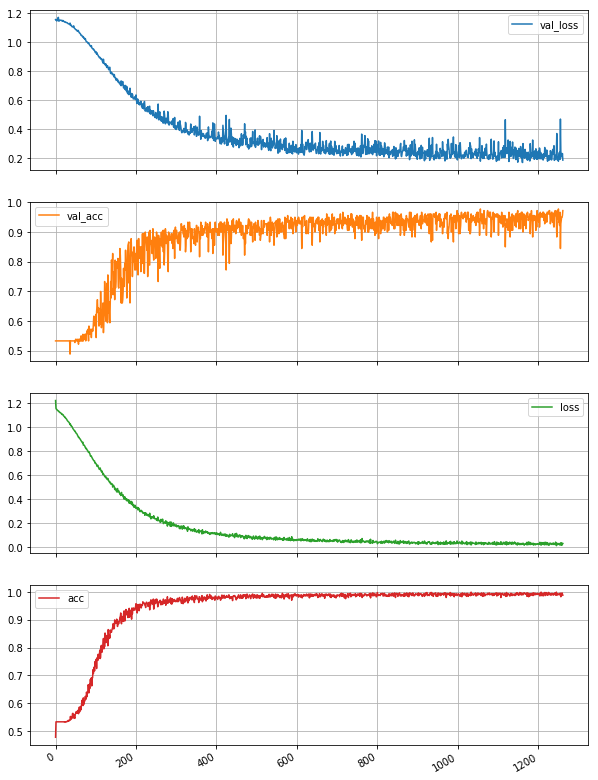

In [11]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [12]:
def decodeLabel(encodedLabel): #function to decode the encoded labels to calculate accuracy of test set
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [13]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv') #importing testing.csv

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))
 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "amitbane")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50287084")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 1  Correct :99
Testing Accuracy: 99.0
